In [1]:

import sqlite3
from prelude import *
from obspy import UTCDateTime, Stream
from tqdm.notebook import trange, tqdm
from scipy import signal
import numpy as np
from obspy.signal.tf_misfit import cwt
from obspy.imaging.cm import obspy_sequential

In [2]:
conn = sqlite3.connect("/scratch/naalexeev/flight_database_new.sqlite")

# Num Planes

In [3]:
conn.execute("SELECT DISTINCT icao24 FROM planes LIMIT 10").fetchall()

[('a34291',),
 ('780bb7',),
 ('78007e',),
 ('a21ed4',),
 ('899124',),
 ('a61c53',),
 ('a7dba2',),
 ('a7f445',),
 ('a262ad',),
 ('a08c0d',)]

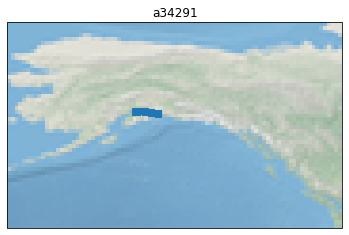

In [4]:
r = conn.execute("SELECT * FROM planes WHERE icao24 = 'a34291' LIMIT 1000").fetchall()

plot_planes(r)

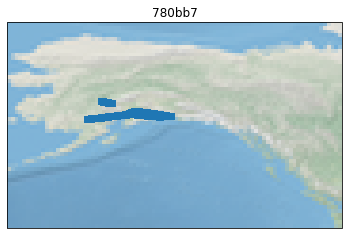

In [5]:
r = conn.execute("SELECT * FROM planes WHERE icao24 = '780bb7' LIMIT 10000").fetchall()

plot_planes(r)

In [6]:
"""
r = conn.execute("SELECT * FROM planes WHERE icao24 = '780bb7' LIMIT 1000000").fetchmany(size=10)
cursor = conn.execute("SELECT * FROM planes")
ax = make_plane_ax()
while 0==0:
    data = cursor.fetchmany(size=10000)
    if len(data)==0:
        break
    plot_planes(data,show_title=False,ax=ax)
plt.show()
"""


'\nr = conn.execute("SELECT * FROM planes WHERE icao24 = \'780bb7\' LIMIT 1000000").fetchmany(size=10)\ncursor = conn.execute("SELECT * FROM planes")\nax = make_plane_ax()\nwhile 0==0:\n    data = cursor.fetchmany(size=10000)\n    if len(data)==0:\n        break\n    plot_planes(data,show_title=False,ax=ax)\nplt.show()\n'

In [7]:
start = conn.execute("SELECT MIN(time) FROM planes LIMIT 10").fetchall()
print(start)

[(1550016001.0,)]


In [8]:
start = conn.execute("SELECT MIN(time) FROM planes LIMIT 10").fetchall()
end = conn.execute("SELECT MAX(time) FROM planes LIMIT 10").fetchall()

In [9]:
print(UTCDateTime(start[0][0]))
print(UTCDateTime(end[0][0]))

2019-02-13T00:00:01.000000Z
2019-03-25T23:59:59.000000Z


In [10]:
select_start = UTCDateTime(2019,2,24)
select_end = select_start + 24.0*60.0*60.0

select_start_t = select_start.timestamp
select_end_t = select_end.timestamp

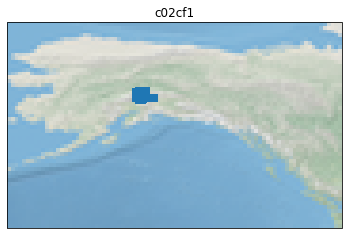

In [11]:
planes = conn.execute("SELECT * FROM planes WHERE lat > 62.78 AND lat < 64.19 AND lon < -147.67 AND lon > -150.22 AND time > {} AND time < {} LIMIT 10000".format(select_start_t,select_end_t)).fetchall()
plot_planes(planes)

In [12]:
print(planes[0])

(1551032795.0, 'c01754', 63.10812377929688, -150.2182006835938, 259.8558441011744, 88.75217044432509, 0.0, 'ACA016', 0, 0, 0, '7425', 10058.4, 10058.4, 1551032794.984, 1551032794.984, 1551031200)


In [ ]:
c02cf1 = conn.execute("SELECT * FROM PLANES WHERE icao24 = 'c02cf1' LIMIT 1000").fetchmany(size=10000)
plot_planes(c02cf1)

In [ ]:
canidates = ["a4c031","899134","89911f","71be25","780994","780d9c","ab19d9","a1ede9","7807d5","aab395"]
for can in canidates:
    print(can)
    plot_planes(select_planes_dict[can])

# looking at aab395


In [ ]:

narrow_aab395 = conn.execute("SELECT * FROM planes WHERE icao24 ='aab395' and time >= {} and time <= {}".format(min(times)+630000,min(times)+650000.0)).fetchall()
print(len(narrow_aab395))
new_times = []
for row in narrow_aab395:
    new_times.append(row[0])
plt.hist(new_times)
plt.show()
plot_planes(narrow_aab395)
plt.show()

In [ ]:
narrow_aab395 = conn.execute("SELECT * FROM planes WHERE icao24 ='aab395' and time >= {} and time <= {}".format(1550900593.0,1550903116.0)).fetchall()
print(len(narrow_aab395))
new_times = []
for row in narrow_aab395:
    new_times.append(row[0])
print(min(new_times))
print(max(new_times))
plt.hist(new_times)
plt.show()
plot_planes(narrow_aab395)
plt.show()

In [ ]:
import numpy
for tr in tqdm(station_slice):
    numpy.savetxt("{}.csv".format(tr.stats["channel"]), tr.data, delimiter=",")

In [ ]:
# Scipy CWT

In [ ]:
print(select_planes[0:10])

In [ ]:
print(select_planes[0:10])

In [ ]:
print(UTCDateTime(select_planes[0][0]))

In [ ]:
print(select_planes[0])
org_planes = get_planes_dict(select_planes)
for k in org_planes:
    print(k)